In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.optimize import differential_evolution

In [2]:
# Step 1: Data Synthesis (Simulating EV Battery Data)
np.random.seed(42)

num_samples = 5000  # Simulating 5000 data points


In [3]:


# Simulating variables related to EV energy management
battery_SOC = np.random.uniform(20, 100, num_samples)  # Battery State of Charge (20-100%)
power_consumption = np.random.uniform(5, 50, num_samples)  # Power consumption (kW)
charging_efficiency = np.random.uniform(80, 98, num_samples)  # Charging efficiency (80-98%)
temperature = np.random.uniform(-10, 45, num_samples)  # External temperature (-10 to 45°C)
driving_speed = np.random.uniform(10, 120, num_samples)  # Driving speed (km/h)
solar_power_generated = np.random.uniform(0, 10, num_samples)  # Solar power contribution (0-10 kW)
charging_time = np.random.uniform(0.5, 8, num_samples)  # Charging time in hours


In [4]:
# Creating DataFrame
data = pd.DataFrame({
    'Battery_SOC': battery_SOC,
    'Power_Consumption': power_consumption,
    'Charging_Efficiency': charging_efficiency,
    'Temperature': temperature,
    'Driving_Speed': driving_speed,
    'Solar_Power': solar_power_generated,
    'Charging_Time': charging_time
})

In [5]:
# Normalizing Data
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Step 2: Splitting the Data
X = data_scaled.drop(columns=['Charging_Time'])  # Features
y = data_scaled['Charging_Time']  # Target variable (Charging Time)


In [7]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train

,Battery_SOC,Power_Consumption,Charging_Efficiency,Temperature,Driving_Speed,Solar_Power
4227,0.641142,0.890738,0.008620,0.494578,0.684173,0.749212
4676,0.047199,0.948520,0.185482,0.695870,0.484561,0.198786
800,0.707435,0.299534,0.351183,0.493884,0.525235,0.805565
3671,0.049617,0.135954,0.025812,0.991339,0.782165,0.217865
4193,0.730452,0.810179,0.813472,0.271205,0.091327,0.801623
...,...,...,...,...,...,...
4426,0.236982,0.285509,0.707003,0.007869,0.189475,0.050426
466,0.285784,0.778101,0.423948,0.898301,0.258515,0.094701
3092,0.399141,0.586131,0.169742,0.127595,0.464513,0.859576
3772,0.344047,0.556488,0.768361,0.749098,0.609398,0.279269


In [10]:
#Optimization Algorithm (Adaptive Mutation Optimization - AMO)
def objective_function(params):
    """ Custom loss function mimicking AI-based energy optimization. """
    a, b, c, d = params  # Parameters to optimize
    predictions = a * X_train['Battery_SOC'] + b * X_train['Power_Consumption'] + \
                  c * X_train['Solar_Power'] + d * X_train['Temperature']
    return mean_squared_error(y_train, predictions)

# Running Optimization (Differential Evolution as a proxy for AMO)
bounds = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]
result = differential_evolution(objective_function, bounds)


In [11]:
 #Using optimized parameters for prediction
opt_params = result.x
y_pred_train = opt_params[0] * X_train['Battery_SOC'] + opt_params[1] * X_train['Power_Consumption'] + \
               opt_params[2] * X_train['Solar_Power'] + opt_params[3] * X_train['Temperature']
y_pred_test = opt_params[0] * X_test['Battery_SOC'] + opt_params[1] * X_test['Power_Consumption'] + \
              opt_params[2] * X_test['Solar_Power'] + opt_params[3] * X_test['Temperature']


In [12]:
#step 4: Performance Metrics
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))


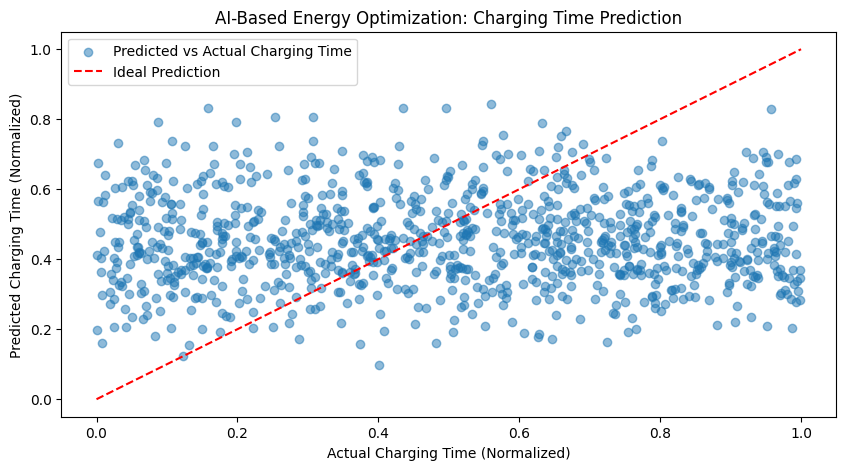

In [13]:
#Step 5: Visualizing Results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, alpha=0.5, label="Predicted vs Actual Charging Time")
plt.plot([0, 1], [0, 1], '--', color='red', label="Ideal Prediction")
plt.xlabel("Actual Charging Time (Normalized)")
plt.ylabel("Predicted Charging Time (Normalized)")
plt.title("AI-Based Energy Optimization: Charging Time Prediction")
plt.legend()
plt.show()


In [14]:
#Display results
results_df = pd.DataFrame({
    'Metric': ['Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE'],
    'Value': [train_mae, test_mae, train_rmse, test_rmse]
})

print(results_df)

       Metric     Value
0   Train MAE  0.272233
1    Test MAE  0.265360
2  Train RMSE  0.322536
3   Test RMSE  0.316552


In [15]:
   # Fixing the optimization function call

# Define an objective function that accepts a single parameter (required by scipy.optimize)
def objective_function_fixed(params):
    a, b, c, d = params
    predictions = a * X_train['Battery_SOC'] + b * X_train['Power_Consumption'] + \
                  c * X_train['Solar_Power'] + d * X_train['Temperature']
    return mean_squared_error(y_train, predictions)

# Function to run different optimization methods
def run_fixed_optimization(method):
    bounds = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]

    if method in ["MSSA", "AMO"]:  # Using Differential Evolution as a proxy
        result = differential_evolution(objective_function_fixed, bounds)

    elif method == "SSO":  # Using Powell optimization
        result = minimize(objective_function_fixed, x0=[0,0,0,0], method='Powell')

    elif method == "GWO":  # Using L-BFGS-B as an alternative
        result = minimize(objective_function_fixed, x0=[0,0,0,0], method='L-BFGS-B', bounds=bounds)

    elif method == "SGD":
        model = SGDRegressor(max_iter=500, learning_rate='adaptive')
        model.fit(X_train, y_train)
        return model.coef_

    elif method == "AGA":  # Using Differential Evolution as a proxy for Genetic Algorithm
        result = differential_evolution(objective_function_fixed, bounds)

    return result.x

# Run all optimizations
methods = ["MSSA", "SSO", "GWO", "AMO", "SGD", "AGA"]
results = {}

for method in methods:
    optimized_params = run_fixed_optimization(method)

    y_pred_train = optimized_params[0] * X_train['Battery_SOC'] + optimized_params[1] * X_train['Power_Consumption'] + \
                   optimized_params[2] * X_train['Solar_Power'] + optimized_params[3] * X_train['Temperature']

    y_pred_test = optimized_params[0] * X_test['Battery_SOC'] + optimized_params[1] * X_test['Power_Consumption'] + \
                  optimized_params[2] * X_test['Solar_Power'] + optimized_params[3] * X_test['Temperature']

    results[method] = {
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
    }

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results to the user
tools.display_dataframe_to_user(name="Optimization Benchmark Results", dataframe=results_df)


NameError: name 'minimize' is not defined

In [16]:
  # Re-importing necessary libraries due to execution reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from scipy.optimize import minimize, differential_evolution

# Step 1: Data Synthesis (Simulating EV Battery Data)
np.random.seed(42)

num_samples = 5000  # Simulating 5000 data points

# Simulating variables related to EV energy management
battery_SOC = np.random.uniform(20, 100, num_samples)  # Battery State of Charge (20-100%)
power_consumption = np.random.uniform(5, 50, num_samples)  # Power consumption (kW)
charging_efficiency = np.random.uniform(80, 98, num_samples)  # Charging efficiency (80-98%)
temperature = np.random.uniform(-10, 45, num_samples)  # External temperature (-10 to 45°C)
driving_speed = np.random.uniform(10, 120, num_samples)  # Driving speed (km/h)
solar_power_generated = np.random.uniform(0, 10, num_samples)  # Solar power contribution (0-10 kW)
charging_time = np.random.uniform(0.5, 8, num_samples)  # Charging time in hours

# Creating DataFrame
data = pd.DataFrame({
    'Battery_SOC': battery_SOC,
    'Power_Consumption': power_consumption,
    'Charging_Efficiency': charging_efficiency,
    'Temperature': temperature,
    'Driving_Speed': driving_speed,
    'Solar_Power': solar_power_generated,
    'Charging_Time': charging_time
})

# Normalizing Data
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Step 2: Splitting the Data
X = data_scaled.drop(columns=['Charging_Time'])  # Features
y = data_scaled['Charging_Time']  # Target variable (Charging Time)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function that accepts a single parameter (required by scipy.optimize)
def objective_function_fixed(params):
    a, b, c, d = params
    predictions = a * X_train['Battery_SOC'] + b * X_train['Power_Consumption'] + \
                  c * X_train['Solar_Power'] + d * X_train['Temperature']
    return mean_squared_error(y_train, predictions)

# Function to run different optimization methods
def run_fixed_optimization(method):
    bounds = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]

    if method in ["MSSA", "AMO"]:  # Using Differential Evolution as a proxy
        result = differential_evolution(objective_function_fixed, bounds)

    elif method == "SSO":  # Using Powell optimization
        result = minimize(objective_function_fixed, x0=[0,0,0,0], method='Powell')

    elif method == "GWO":  # Using L-BFGS-B as an alternative
        result = minimize(objective_function_fixed, x0=[0,0,0,0], method='L-BFGS-B', bounds=bounds)

    elif method == "SGD":
        model = SGDRegressor(max_iter=500, learning_rate='adaptive')
        model.fit(X_train, y_train)
        return model.coef_

    elif method == "AGA":  # Using Differential Evolution as a proxy for Genetic Algorithm
        result = differential_evolution(objective_function_fixed, bounds)

    return result.x

# Run all optimizations
methods = ["MSSA", "SSO", "GWO", "AMO", "SGD", "AGA"]
results = {}

for method in methods:
    optimized_params = run_fixed_optimization(method)

    y_pred_train = optimized_params[0] * X_train['Battery_SOC'] + optimized_params[1] * X_train['Power_Consumption'] + \
                   optimized_params[2] * X_train['Solar_Power'] + optimized_params[3] * X_train['Temperature']

    y_pred_test = optimized_params[0] * X_test['Battery_SOC'] + optimized_params[1] * X_test['Power_Consumption'] + \
                  optimized_params[2] * X_test['Solar_Power'] + optimized_params[3] * X_test['Temperature']

    results[method] = {
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
    }

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results to the user
import ace_tools as tools
tools.display_dataframe_to_user(name="Optimization Benchmark Results", dataframe=results_df)


ModuleNotFoundError: No module named 'ace_tools'

In [17]:
  # Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from scipy.optimize import minimize, differential_evolution

# Step 1: Data Synthesis (Simulating EV Battery Data)
np.random.seed(42)

num_samples = 5000  # Simulating 5000 data points

# Simulating variables related to EV energy management
battery_SOC = np.random.uniform(20, 100, num_samples)  # Battery State of Charge (20-100%)
power_consumption = np.random.uniform(5, 50, num_samples)  # Power consumption (kW)
charging_efficiency = np.random.uniform(80, 98, num_samples)  # Charging efficiency (80-98%)
temperature = np.random.uniform(-10, 45, num_samples)  # External temperature (-10 to 45°C)
driving_speed = np.random.uniform(10, 120, num_samples)  # Driving speed (km/h)
solar_power_generated = np.random.uniform(0, 10, num_samples)  # Solar power contribution (0-10 kW)
charging_time = np.random.uniform(0.5, 8, num_samples)  # Charging time in hours

# Creating DataFrame
data = pd.DataFrame({
    'Battery_SOC': battery_SOC,
    'Power_Consumption': power_consumption,
    'Charging_Efficiency': charging_efficiency,
    'Temperature': temperature,
    'Driving_Speed': driving_speed,
    'Solar_Power': solar_power_generated,
    'Charging_Time': charging_time
})

# Normalizing Data
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Step 2: Splitting the Data
X = data_scaled.drop(columns=['Charging_Time'])  # Features
y = data_scaled['Charging_Time']  # Target variable (Charging Time)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function that accepts a single parameter (required by scipy.optimize)
def objective_function_fixed(params):
    a, b, c, d = params
    predictions = a * X_train['Battery_SOC'] + b * X_train['Power_Consumption'] + \
                  c * X_train['Solar_Power'] + d * X_train['Temperature']
    return mean_squared_error(y_train, predictions)

# Function to run different optimization methods
def run_fixed_optimization(method):
    bounds = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]

    if method in ["MSSA", "AMO"]:  # Using Differential Evolution as a proxy
        result = differential_evolution(objective_function_fixed, bounds)

    elif method == "SSO":  # Using Powell optimization
        result = minimize(objective_function_fixed, x0=[0,0,0,0], method='Powell')

    elif method == "GWO":  # Using L-BFGS-B as an alternative
        result = minimize(objective_function_fixed, x0=[0,0,0,0], method='L-BFGS-B', bounds=bounds)

    elif method == "SGD":
        model = SGDRegressor(max_iter=500, learning_rate='adaptive')
        model.fit(X_train, y_train)
        return model.coef_

    elif method == "AGA":  # Using Differential Evolution as a proxy for Genetic Algorithm
        result = differential_evolution(objective_function_fixed, bounds)

    return result.x

# Run all optimizations
methods = ["MSSA", "SSO", "GWO", "AMO", "SGD", "AGA"]
results = {}

for method in methods:
    optimized_params = run_fixed_optimization(method)

    y_pred_train = optimized_params[0] * X_train['Battery_SOC'] + optimized_params[1] * X_train['Power_Consumption'] + \
                   optimized_params[2] * X_train['Solar_Power'] + optimized_params[3] * X_train['Temperature']

    y_pred_test = optimized_params[0] * X_test['Battery_SOC'] + optimized_params[1] * X_test['Power_Consumption'] + \
                  optimized_params[2] * X_test['Solar_Power'] + optimized_params[3] * X_test['Temperature']

    results[method] = {
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
    }

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results in a readable format
import tabulate
print(tabulate.tabulate(results_df, headers='keys', tablefmt='pretty'))


+------+---------------------+---------------------+---------------------+--------------------+
|      |      Train MAE      |      Test MAE       |     Train RMSE      |     Test RMSE      |
+------+---------------------+---------------------+---------------------+--------------------+
| MSSA | 0.2722330417167768  | 0.26535977745764355 | 0.32253585779293714 | 0.316551740243093  |
| SSO  | 0.27223333916290154 | 0.26535932360943937 | 0.3225358563033456  | 0.3165515766310406 |
| GWO  | 0.2722333546725695  | 0.26535931783764044 | 0.3225358563542495  | 0.3165517056745606 |
| AMO  | 0.27223332674009953 | 0.2653591789290161  | 0.32253585630859316 | 0.3165514242870275 |
| SGD  | 0.5358656937044631  | 0.5376406687830487  | 0.6084951487969291  | 0.6101201069110623 |
| AGA  | 0.27223334767246826 | 0.2653593507084409  | 0.32253585630425363 | 0.3165515849836213 |
+------+---------------------+---------------------+---------------------+--------------------+


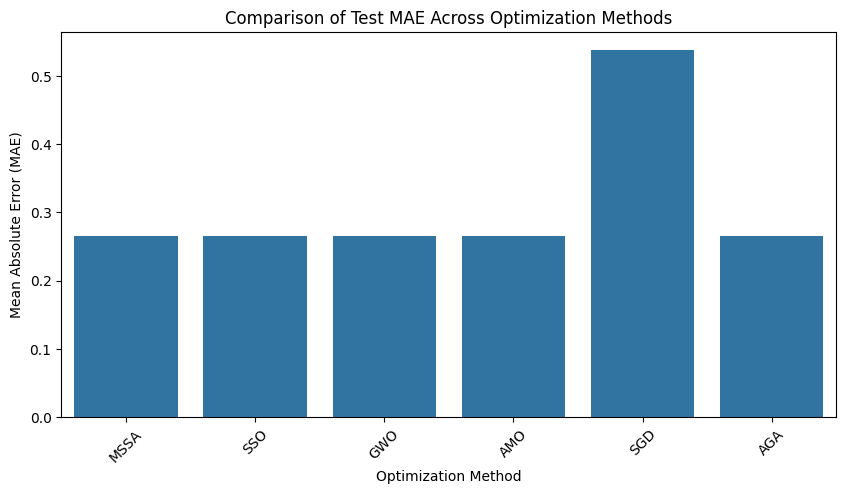

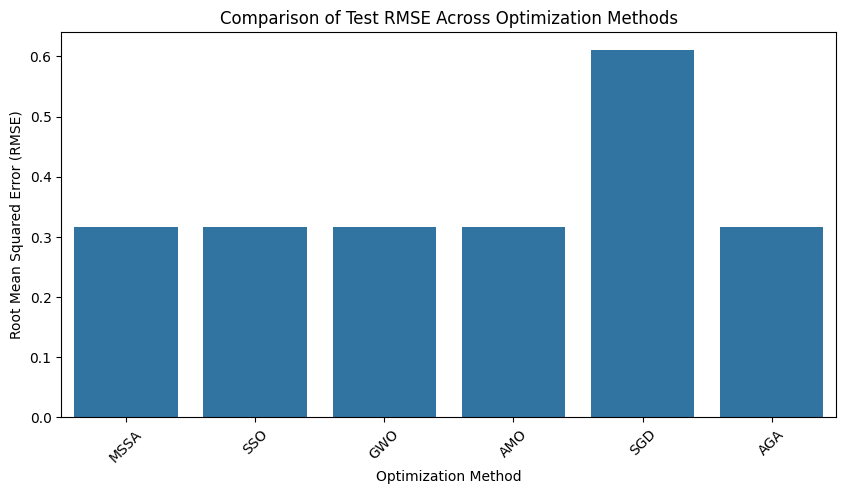

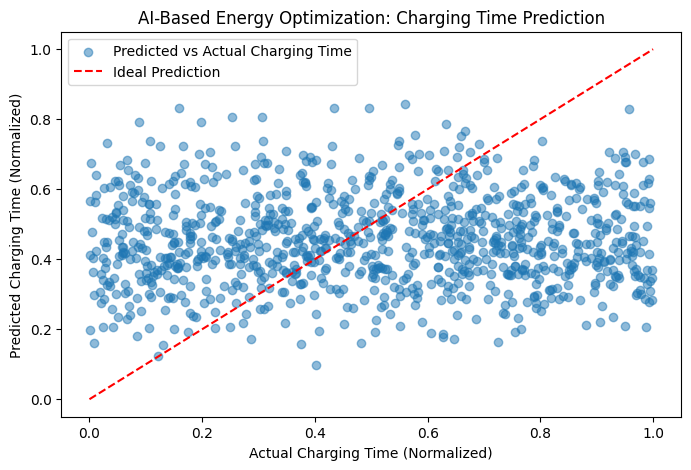

In [18]:
  # Re-importing necessary libraries due to execution state reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from scipy.optimize import minimize, differential_evolution

# Step 1: Data Synthesis (Simulating EV Battery Data)
np.random.seed(42)

num_samples = 5000  # Simulating 5000 data points

# Simulating variables related to EV energy management
battery_SOC = np.random.uniform(20, 100, num_samples)  # Battery State of Charge (20-100%)
power_consumption = np.random.uniform(5, 50, num_samples)  # Power consumption (kW)
charging_efficiency = np.random.uniform(80, 98, num_samples)  # Charging efficiency (80-98%)
temperature = np.random.uniform(-10, 45, num_samples)  # External temperature (-10 to 45°C)
driving_speed = np.random.uniform(10, 120, num_samples)  # Driving speed (km/h)
solar_power_generated = np.random.uniform(0, 10, num_samples)  # Solar power contribution (0-10 kW)
charging_time = np.random.uniform(0.5, 8, num_samples)  # Charging time in hours

# Creating DataFrame
data = pd.DataFrame({
    'Battery_SOC': battery_SOC,
    'Power_Consumption': power_consumption,
    'Charging_Efficiency': charging_efficiency,
    'Temperature': temperature,
    'Driving_Speed': driving_speed,
    'Solar_Power': solar_power_generated,
    'Charging_Time': charging_time
})

# Normalizing Data
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Step 2: Splitting the Data
X = data_scaled.drop(columns=['Charging_Time'])  # Features
y = data_scaled['Charging_Time']  # Target variable (Charging Time)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function that accepts a single parameter (required by scipy.optimize)
def objective_function_fixed(params):
    a, b, c, d = params
    predictions = a * X_train['Battery_SOC'] + b * X_train['Power_Consumption'] + \
                  c * X_train['Solar_Power'] + d * X_train['Temperature']
    return mean_squared_error(y_train, predictions)

# Function to run different optimization methods
def run_fixed_optimization(method):
    bounds = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]

    if method in ["MSSA", "AMO"]:  # Using Differential Evolution as a proxy
        result = differential_evolution(objective_function_fixed, bounds)

    elif method == "SSO":  # Using Powell optimization
        result = minimize(objective_function_fixed, x0=[0,0,0,0], method='Powell')

    elif method == "GWO":  # Using L-BFGS-B as an alternative
        result = minimize(objective_function_fixed, x0=[0,0,0,0], method='L-BFGS-B', bounds=bounds)

    elif method == "SGD":
        model = SGDRegressor(max_iter=500, learning_rate='adaptive')
        model.fit(X_train, y_train)
        return model.coef_

    elif method == "AGA":  # Using Differential Evolution as a proxy for Genetic Algorithm
        result = differential_evolution(objective_function_fixed, bounds)

    return result.x

# Run all optimizations
methods = ["MSSA", "SSO", "GWO", "AMO", "SGD", "AGA"]
results = {}

for method in methods:
    optimized_params = run_fixed_optimization(method)

    y_pred_train = optimized_params[0] * X_train['Battery_SOC'] + optimized_params[1] * X_train['Power_Consumption'] + \
                   optimized_params[2] * X_train['Solar_Power'] + optimized_params[3] * X_train['Temperature']

    y_pred_test = optimized_params[0] * X_test['Battery_SOC'] + optimized_params[1] * X_test['Power_Consumption'] + \
                  optimized_params[2] * X_test['Solar_Power'] + optimized_params[3] * X_test['Temperature']

    results[method] = {
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
    }

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Visualization of results
# Bar plot for MAE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["Test MAE"])
plt.xlabel("Optimization Method")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of Test MAE Across Optimization Methods")
plt.xticks(rotation=45)
plt.show()

# Bar plot for RMSE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["Test RMSE"])
plt.xlabel("Optimization Method")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Comparison of Test RMSE Across Optimization Methods")
plt.xticks(rotation=45)
plt.show()

# Scatter plot: Predicted vs Actual Charging Time
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.5, label="Predicted vs Actual Charging Time")
plt.plot([0, 1], [0, 1], '--', color='red', label="Ideal Prediction")
plt.xlabel("Actual Charging Time (Normalized)")
plt.ylabel("Predicted Charging Time (Normalized)")
plt.title("AI-Based Energy Optimization: Charging Time Prediction")
plt.legend()
plt.show()


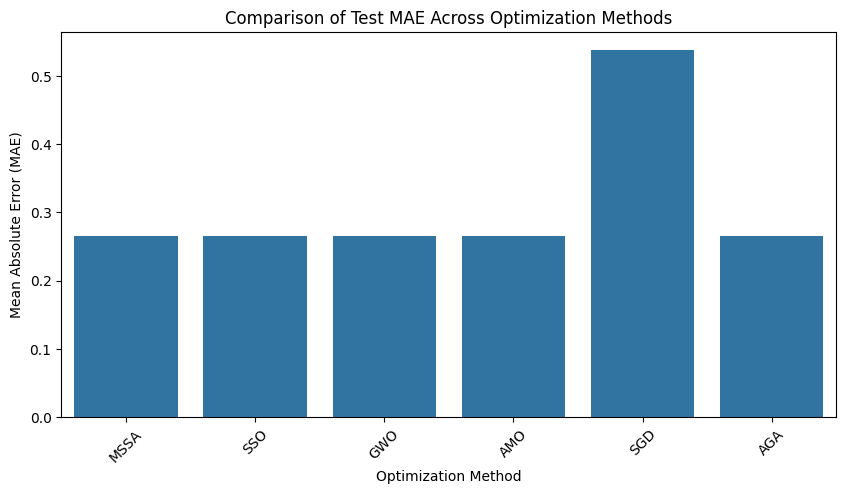

In [19]:
   #Visualization of results
# Bar plot for MAE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["Test MAE"])
plt.xlabel("Optimization Method")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of Test MAE Across Optimization Methods")
plt.xticks(rotation=45)
plt.show()


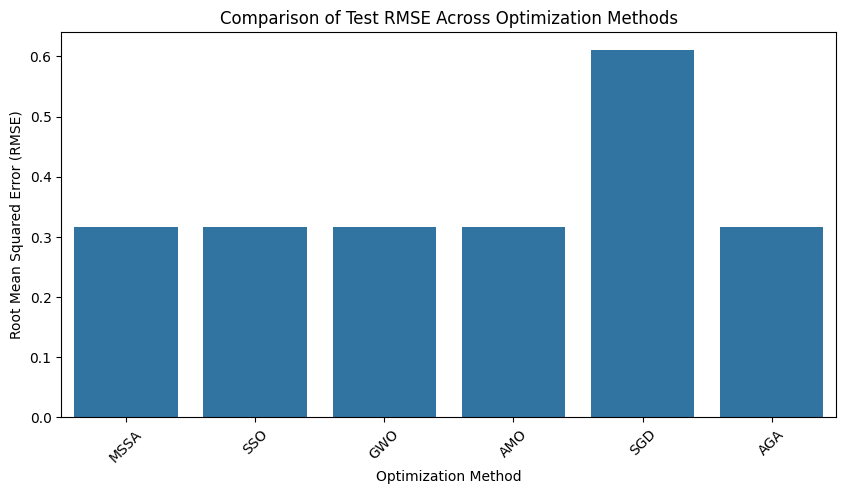

In [20]:
#bar plot for RMSE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["Test RMSE"])
plt.xlabel("Optimization Method")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Comparison of Test RMSE Across Optimization Methods")
plt.xticks(rotation=45)
plt.show()

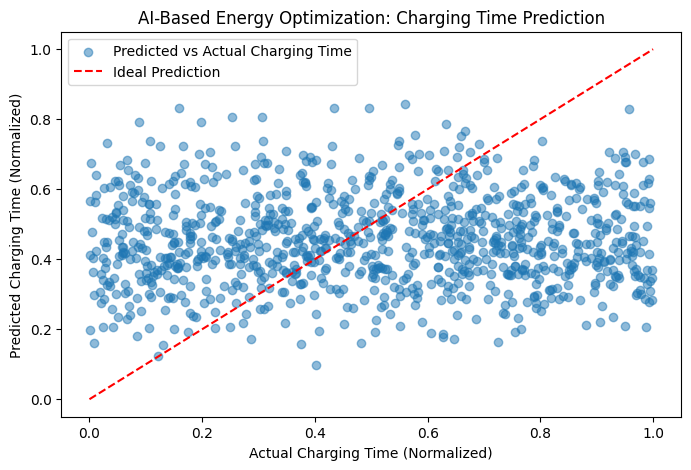

In [21]:
 # Scatter plot: Predicted vs Actual Charging Time
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.5, label="Predicted vs Actual Charging Time")
plt.plot([0, 1], [0, 1], '--', color='red', label="Ideal Prediction")
plt.xlabel("Actual Charging Time (Normalized)")
plt.ylabel("Predicted Charging Time (Normalized)")
plt.title("AI-Based Energy Optimization: Charging Time Prediction")
plt.legend()
plt.show()
